In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = "2021_cleaned_personal_property_list.csv"  # Update this path accordingly
df = pd.read_csv(file_path, encoding='latin1', low_memory=False)
df


,AGENCY_CODE,STATE_AGENCY,PROPERTY_TYPE,PROPERTY_CLASSIFICATION,PROPERTY_NAME,DATE_ACQUIRED_OR_INSTALLED,VALUE_OR_COST,IT_OR_NON-IT
0,10,OSU-STILLWATER,PERSONAL PROPERTY,OWNED,"Data Terminal, Ti (S Cint. Ctr) Mdl 700As",1977-08-15,20600.00,IT
1,10,OSU-STILLWATER,PERSONAL PROPERTY,OWNED,"Computer, Dell Dimension 5150C",2006-05-25,1337.87,IT
2,10,OSU-STILLWATER,PERSONAL PROPERTY,OWNED,Dell Intel Pentium 4 Processor 630 W/Ht,2007-05-17,936.16,IT
3,10,OSU-STILLWATER,PERSONAL PROPERTY,OWNED,"Vostrp 700, Intel Core2 Duo",2007-08-27,1138.88,IT
4,10,OSU-STILLWATER,PERSONAL PROPERTY,OWNED,Optiplex 740 Small Factor Athion,2007-10-25,941.84,IT
...,...,...,...,...,...,...,...,...
96618,981,OKLAHOMA MUNICIPAL POWER AUTHORITY,PERSONAL PROPERTY,NaN,R&R - Turk 2021,2021-01-01,819706.53,NON-IT
96619,981,OKLAHOMA MUNICIPAL POWER AUTHORITY,PERSONAL PROPERTY,NaN,R&R - Mcclain 2021,2021-01-01,154424.55,NON-IT
96620,981,OKLAHOMA MUNICIPAL POWER AUTHORITY,PERSONAL PROPERTY,NaN,R&R - Redbud Plant 2020,2021-01-01,611406.46,NON-IT
96621,981,OKLAHOMA MUNICIPAL POWER AUTHORITY,PERSONAL PROPERTY,NaN,R&R Ponca City - 2021,2021-01-01,638740.30,NON-IT


In [3]:
### DESCRIPTIVE ANALYSIS ###
print("Total number of records in the dataset:", len(df))
print("Unique state agencies:", df['STATE_AGENCY'].nunique())
print("Most common property types:")
print(df['PROPERTY_TYPE'].value_counts().head(10))
print("\nProperty classification distribution:")
print(df['PROPERTY_NAME'].value_counts())
print("\nIT vs Non-IT distribution:")
print(df['IT_OR_NON-IT'].value_counts())

Total number of records in the dataset: 96623
Unique state agencies: 112
Most common property types:
PROPERTY_TYPE
PERSONAL PROPERTY    96623
Name: count, dtype: int64

Property classification distribution:
PROPERTY_NAME
Laptop                                                                                                  666
Dell Marketing Lp                                                                                       522
Radar, Stalker Dual Dsr 2X, Counting Unit                                                               433
Radar, Stalker Dual Dsr 2X, Antenna                                                                     404
Cpu                                                                                                     396
                                                                                                       ... 
Apple Imac - 21.5" Screen (W/4K Retina),3.6Ghz Quad-Core Intel Core I3 Processor,16Gb Ram, 512Gb Ssd      1
Apple Imac - 27" Screen

In [4]:
### FINANCIAL ANALYSIS ###
# Convert Value or Cost to numeric
df['VALUE_OR_COST'] = pd.to_numeric(df['VALUE_OR_COST'], errors='coerce')

In [5]:
print("\nTotal value of all properties:", df['VALUE_OR_COST'].sum())
print("Average cost of IT properties:", df[df['IT_OR_NON-IT'] == 'IT']['VALUE_OR_COST' ].mean())
print("Average cost of Non-IT properties:", df[df['IT_OR_NON-IT'] == 'NON-IT']['VALUE_OR_COST'].mean())


Total value of all properties: 2864191260.6400003
Average cost of IT properties: 11025.341028878314
Average cost of Non-IT properties: 45601.321393091646


In [6]:
# Most expensive property
most_expensive = df.loc[df['VALUE_OR_COST'].idxmax()]
print("Most expensive property:", most_expensive['PROPERTY_NAME'], "- Value:", most_expensive['VALUE_OR_COST'])

# Agency with the highest total property value
top_agency = df.groupby('STATE_AGENCY')['VALUE_OR_COST'].sum().idxmax()
print("Agency with highest total property value:", top_agency)

Most expensive property: Turk Power Plant - Value: 128465942.28
Agency with highest total property value: OKLAHOMA MUNICIPAL POWER AUTHORITY


In [7]:
### CATEGORICAL ANALYSIS ###
print("\nTop 10 most frequently occurring property names:")
print(df['PROPERTY_NAME'].value_counts().head(10))
print("Agencies with the most diverse range of property types:")
print(df.groupby('STATE_AGENCY')['PROPERTY_TYPE'].nunique().sort_values(ascending=False).head(10))


Top 10 most frequently occurring property names:
PROPERTY_NAME
Laptop                                       666
Dell Marketing Lp                            522
Radar, Stalker Dual Dsr 2X, Counting Unit    433
Radar, Stalker Dual Dsr 2X, Antenna          404
Cpu                                          396
Printer                                      383
Trailer                                      357
Student Union                                345
Computer                                     340
Truck                                        334
Name: count, dtype: int64
Agencies with the most diverse range of property types:
STATE_AGENCY
ABSTRACTORS BOARD                           1
ACCOUNTANCY BOARD                           1
OSU-STILLWATER                              1
OSTEOPATHIC EXAMINERS BOARD                 1
OPTOMETRY BOARD                             1
OMES                                        1
OKLAHOMA WORKERS COMPENSATION COMMISSION    1
OKLAHOMA TURNPIKE AUTHORITY  

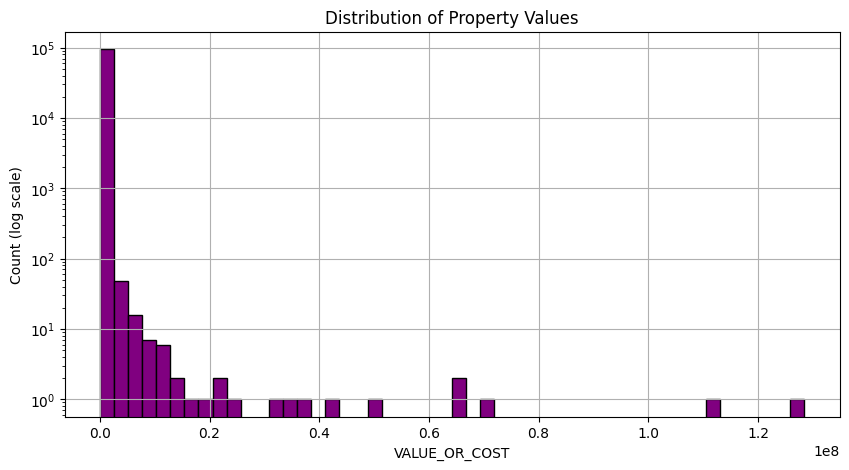

In [8]:
### DATA VISUALIZATION ###
# Histogram of property values
plt.figure(figsize=(10,5))
df['VALUE_OR_COST'].dropna().hist(bins=50, color='purple', edgecolor='black')
plt.yscale('log')
plt.title("Distribution of Property Values")
plt.xlabel("VALUE_OR_COST")
plt.ylabel("Count (log scale)")
plt.show()

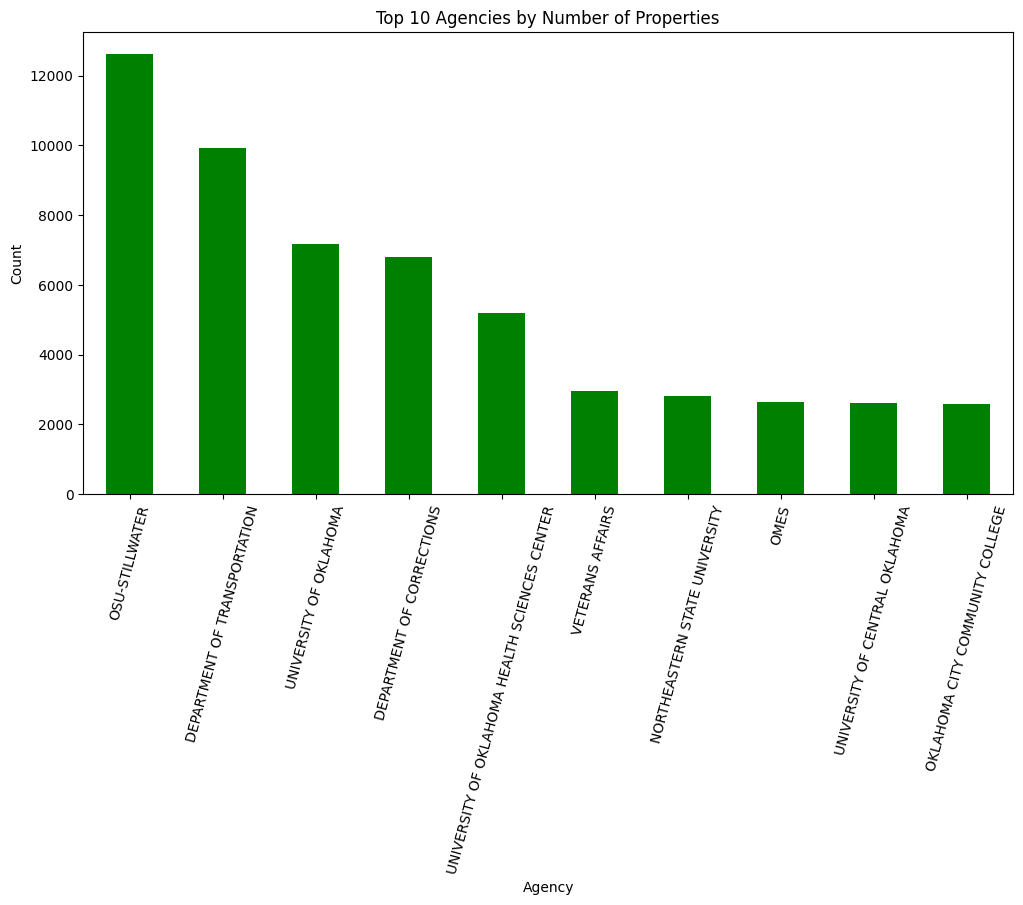

In [9]:
# Properties per agency (top 10)
plt.figure(figsize=(12,6))
df['STATE_AGENCY'].value_counts().head(10).plot(kind='bar', color='green')
plt.title("Top 10 Agencies by Number of Properties")
plt.xlabel("Agency")
plt.ylabel("Count")
plt.xticks(rotation=75)
plt.show()

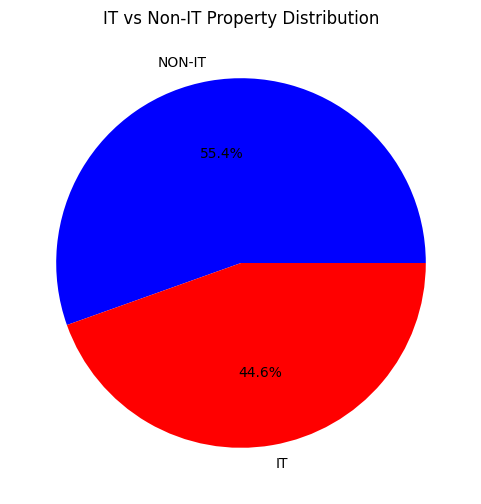

In [10]:
# IT vs Non-IT properties
plt.figure(figsize=(6,6))
df['IT_OR_NON-IT'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'red'])
plt.title("IT vs Non-IT Property Distribution")
plt.ylabel("")
plt.show()

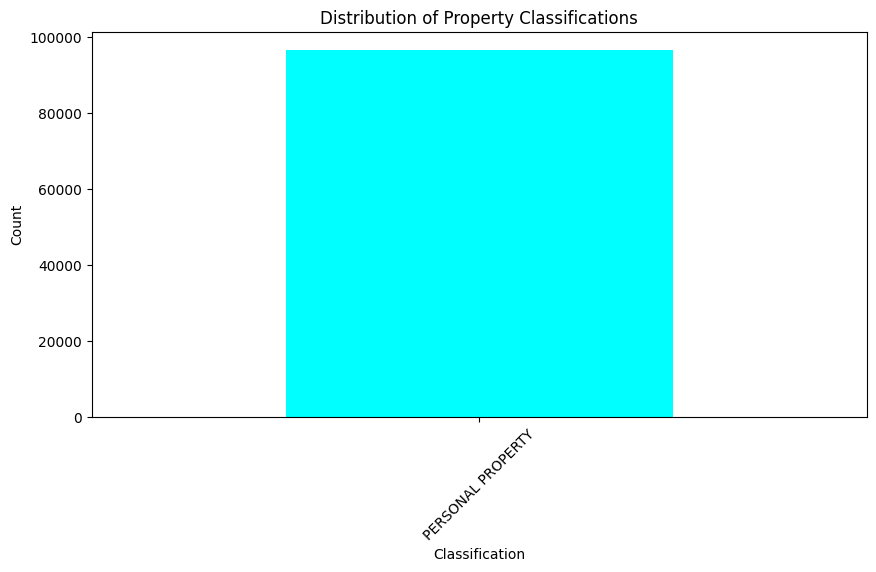

In [11]:
# Property Classification Distribution
plt.figure(figsize=(10,5))
df['PROPERTY_TYPE'].value_counts().plot(kind='bar', color='cyan')
plt.title("Distribution of Property Classifications")
plt.xlabel("Classification")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

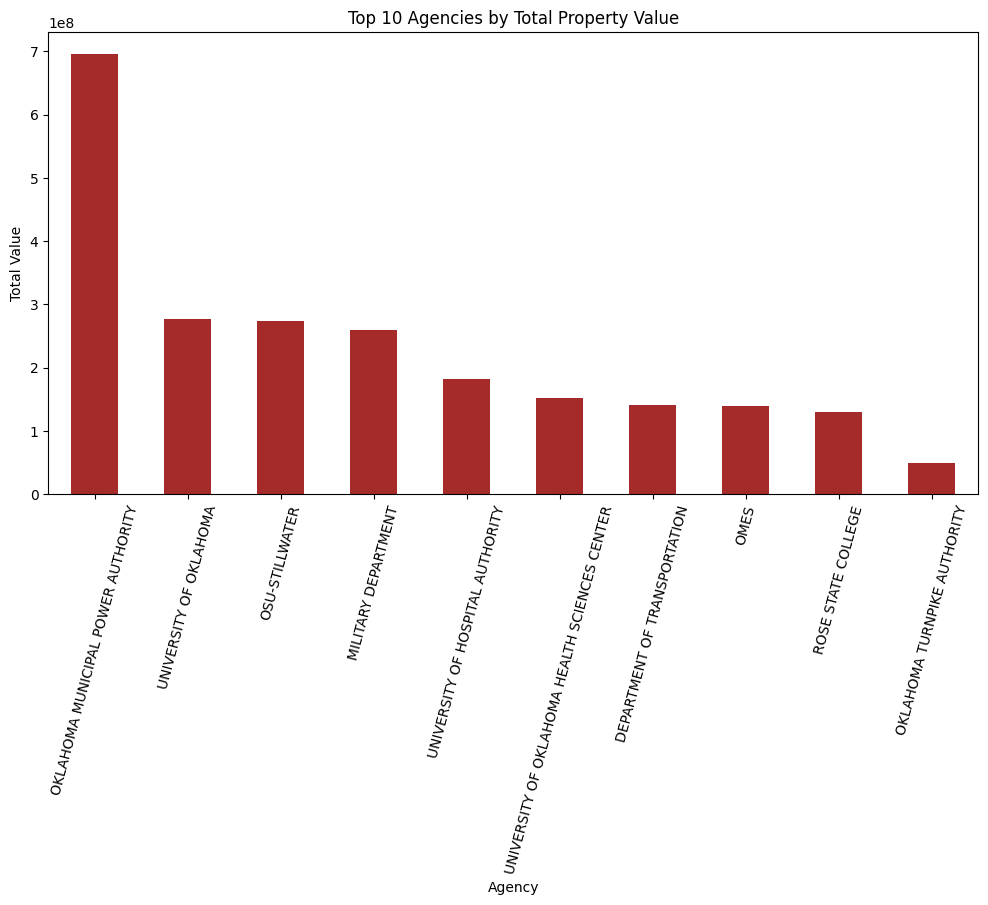

In [12]:
# Top agencies by total property value
plt.figure(figsize=(12,6))
df.groupby('STATE_AGENCY')['VALUE_OR_COST'].sum().nlargest(10).plot(kind='bar', color='brown')
plt.title("Top 10 Agencies by Total Property Value")
plt.xlabel("Agency")
plt.ylabel("Total Value")
plt.xticks(rotation=75)
plt.show()

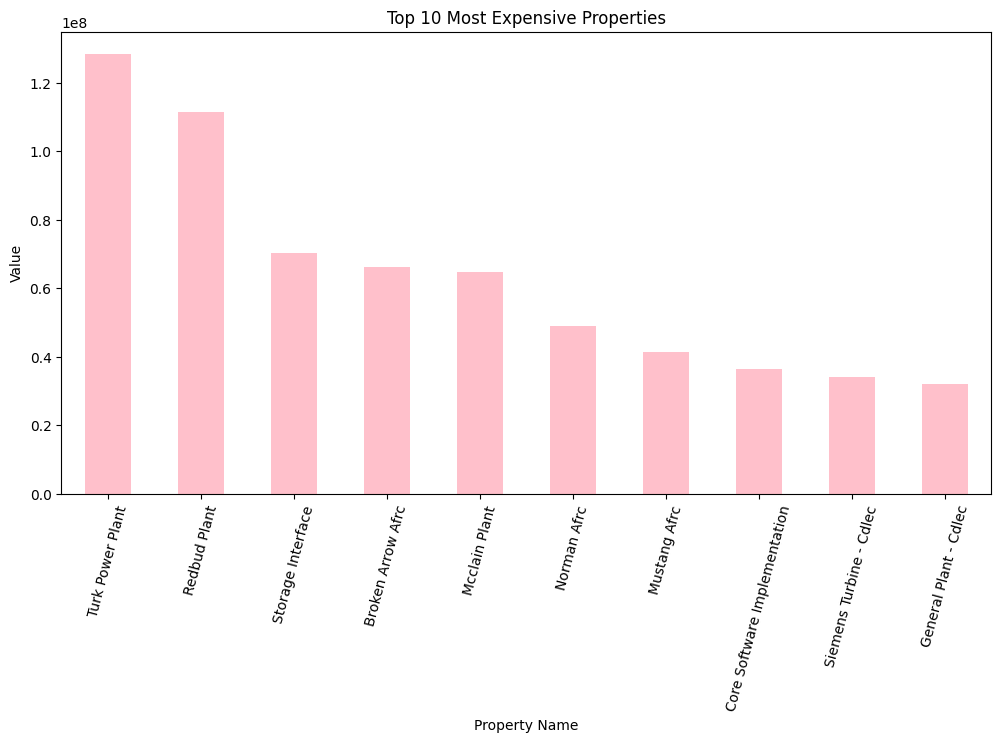

In [13]:
# Top 10 most expensive properties
plt.figure(figsize=(12,6))
df.nlargest(10, 'VALUE_OR_COST').set_index('PROPERTY_NAME')['VALUE_OR_COST'].plot(kind='bar', color='pink')
plt.title("Top 10 Most Expensive Properties")
plt.xlabel("Property Name")
plt.ylabel("Value")
plt.xticks(rotation=75)
plt.show()

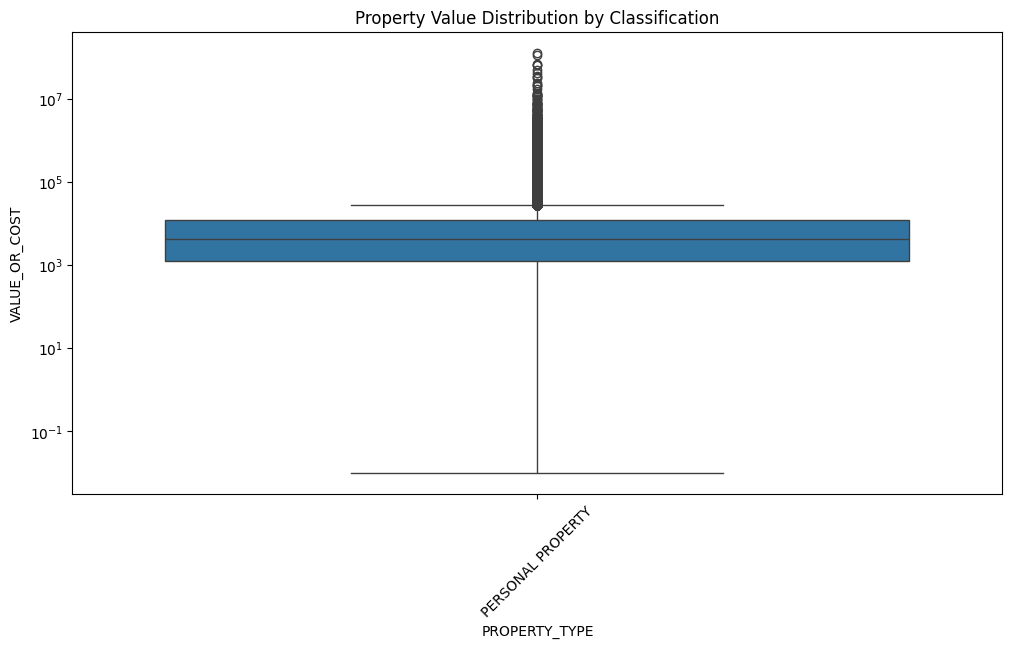

In [14]:
# Box plot of property value by classification
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='PROPERTY_TYPE', y='VALUE_OR_COST')
plt.yscale("log")
plt.title("Property Value Distribution by Classification")
plt.xticks(rotation=45)
plt.show()

In [15]:
print("\nAnalysis completed.")


Analysis completed.
